# 各級學校縣市別學生人數統計資料(106學年度~110學年度)
    * 資料來源：https://data.gov.tw/dataset/40121
    * 因需要繪圖，先 pip install matplotlib
    * 技職高中以"高級中等學校-專業(職業)群科"為代表
    * 大專校院選擇"全部計入校本部"

### 1. 匯入106edu.csv的資料，並列出表格

In [140]:
import pandas as pd
data = pd.read_csv('106edu.csv')
data.head()

,學年度,縣市別,幼兒園,國小,國中,高級中等學校-普通科,高級中等學校-專業(職業)群科,高級中等學校-綜合高中,高級中等學校-實用技能學程,高級中等學校-進修部(學校),大專校院(全部計入校本部),大專校院(跨縣市教學計入所在地縣市),宗教研修學院,國民補習及大專進修學校及空大,特殊教育學校
0,106,新北市,81348,192321,100608,40999,37328,5581,917,5336,151475,145054,116,16615,385
1,106,臺北市,52253,115679,66746,58742,35058,4072,377,5448,263668,241829,81,8120,779
2,106,桃園市,51322,122590,67375,29822,35420,3032,4770,5965,102983,114101,0,2633,450
3,106,臺中市,77619,150412,85244,37962,50784,2020,3836,6211,188641,188114,0,9450,897
4,106,臺南市,46663,87329,50556,25817,22075,4418,4007,2540,124447,126610,0,1397,482


### 2. 列出106學年幼兒園、國小、國中、高級中等學校-普通科、高級中等學校-專業(職業)群科、大專校院(全部計入校本部)的學生人數分布折線圖

In [141]:
import matplotlib

# 找出套件安裝位置
print(matplotlib.__file__)

C:\Users\Peggy\anaconda3\lib\site-packages\matplotlib\__init__.py


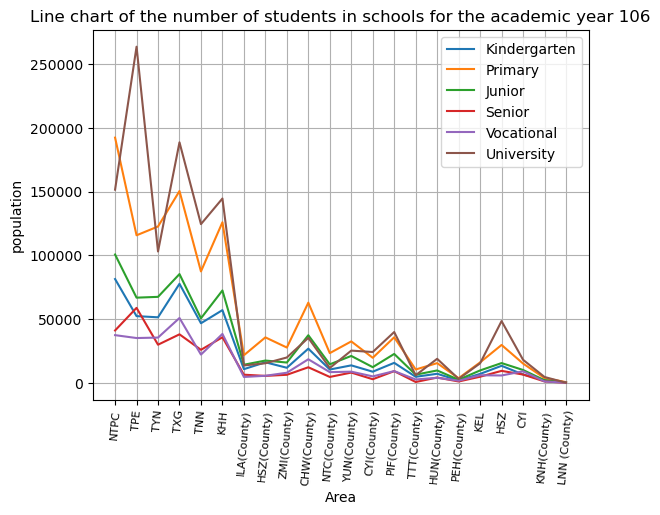

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('106edu.csv')

# 篩選我們要的資料
Area = df["縣市別"]
Kindergarten = df["幼兒園"]
Primary = df["國小"]
Junior = df["國中"]
Senior = df["高級中等學校-普通科"]
Vocational = df["高級中等學校-專業(職業)群科"]
University = df["大專校院(全部計入校本部)"]

# 修復負號顯示問題
plt.rcParams['axes.unicode_minus']=False

# 繪圖
plt.plot(Area, Kindergarten)
plt.plot(Area, Primary)
plt.plot(Area, Junior)
plt.plot(Area, Senior)
plt.plot(Area, Vocational)
plt.plot(Area, University)

plt.xlabel("Area")    # x軸標籤
plt.ylabel("population")    # y軸標籤
plt.legend(["Kindergarten", "Primary", "Junior", "Senior", "Vocational", "University"], loc="upper right")    # 圖示，共有左下、左上、右下、右上四個方位
plt.title("Line chart of the number of students in schools for the academic year 106")    # 主標題
plt.grid(True)    # 是否有網格?

# 設定 x 軸標籤

plt.xticks(range(len(Area)), ["NTPC", "TPE", "TYN", "TXG", "TNN", "KHH", "ILA(County)", "HSZ(County)", "ZMI(County)", "CHW(County)", "NTC(County)", "YUN(County)", "CYI(County)", "PIF(County)", "TTT(County)", "HUN(County)", "PEH(County)", "KEL", "HSZ", "CYI", "KNH(County)", "LNN (County)"], rotation=85, fontsize=8)

# 顯示圖片
plt.show()

#### 問1. 106學年度各縣市哪一個學制的人數最多?

In [144]:
import pandas as pd

# 讀取CSV檔
df = pd.read_csv('106edu.csv')

# 取出所有不重複的縣市名稱
counties = df['縣市別'].unique()

for county in counties:
    # 取出這個縣市的資料
    county_data = df[df['縣市別'] == county]
    
    # 取出需要處理的部分表格資料
    data = county_data.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

    # 找出最大值所在的位置
    max_index = data.max(axis=0).argmax()

    # 將最大值所在的位置轉換為對應的文字
    if max_index == 0:
        inf = '幼兒園'
    elif max_index == 1:
        inf = '國小'
    elif max_index == 2:
        inf = '國中'
    elif max_index == 3:
        inf = '高級中等學校-普通科'
    elif max_index == 4:
        inf = '高級中等學校-專業群科'
    elif max_index == 5:
        inf = '大專校院(全部計入校本部)'
    else:
        inf = 'Unknown'

    # 輸出結果
    print(county, '中最多學生數的學制在', inf,'，人數為', data.max(axis=0)[max_index], '人')


新北市 中最多學生數的學制在 國小 ，人數為 192321.0 人
臺北市 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 263668.0 人
桃園市 中最多學生數的學制在 國小 ，人數為 122590.0 人
臺中市 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 188641.0 人
臺南市 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 124447.0 人
高雄市 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 144540.0 人
宜蘭縣 中最多學生數的學制在 國小 ，人數為 21563.0 人
新竹縣 中最多學生數的學制在 國小 ，人數為 35578.0 人
苗栗縣 中最多學生數的學制在 國小 ，人數為 27602.0 人
彰化縣 中最多學生數的學制在 國小 ，人數為 62830.0 人
南投縣 中最多學生數的學制在 國小 ，人數為 23221.0 人
雲林縣 中最多學生數的學制在 國小 ，人數為 32410.0 人
嘉義縣 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 24088.0 人
屏東縣 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 39787.0 人
臺東縣 中最多學生數的學制在 國小 ，人數為 10385.0 人
花蓮縣 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 18762.0 人
澎湖縣 中最多學生數的學制在 國小 ，人數為 3524.0 人
基隆市 中最多學生數的學制在 國小 ，人數為 15944.0 人
新竹市 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 48359.0 人
嘉義市 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 18014.0 人
金門縣 中最多學生數的學制在 大專校院(全部計入校本部) ，人數為 4501.0 人
連江縣 中最多學生數的學制在 國小 ，人數為 474.0 人


#### 問2. 106學年度台灣哪一個"最多學生數的學制"出現次數最多?
    因高職與普通高中分開計算故整體人數較少

In [70]:
import pandas as pd

# 讀取CSV檔
df = pd.read_csv('106edu.csv')

# 取出所有不重複的縣市名稱
counties = df['縣市別'].unique()

# 建立一個空字典，用來紀錄每個縣市出現次數最多的學制
max_edu_dict = {}

for county in counties:
    # 取出這個縣市的資料
    county_data = df[df['縣市別'] == county]
    
    # 取出需要處理的部分表格資料
    data = county_data.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

    # 找出最大值所在的位置
    max_index = data.values.argmax()

    # 將最大值所在的位置轉換為對應的文字
    if max_index == 0:
        inf = '幼兒園'
    elif max_index == 1:
        inf = '國小'
    elif max_index == 2:
        inf = '國中'
    elif max_index == 3:
        inf = '高級中等學校-普通科'
    elif max_index == 4:
        inf = '高級中等學校-專業群科'
    elif max_index == 5:
        inf = '大專校院(全部計入校本部)'
    else:
        inf = 'Unknown'

    # 將紀錄每個縣市出現次數最多的學制的字典更新
    if inf not in max_edu_dict:
        max_edu_dict[inf] = 1
    else:
        max_edu_dict[inf] += 1

# 找出出現次數最多的學制
max_edu = max(max_edu_dict, key=max_edu_dict.get)

# 輸出結果
print('出現次數最多的學制是', max_edu, '，共有', max_edu_dict[max_edu],'個縣市')


出現次數最多的學制是 國小 ，共有 12 個縣市


### 3. 匯入107學年度~110學年度的資料

In [80]:
df107 = pd.read_csv('107edu.csv')
df108 = pd.read_csv('108edu.csv')
df109 = pd.read_csv('109edu.csv')
df110 = pd.read_csv('110edu.csv')

#### 問3. 107學年度~110學年度哪個年份的學生總數最多?比較各學年學生總人數的大小並排序

In [89]:
import pandas as pd

# 讀取CSV檔
df107 = pd.read_csv('107edu.csv')
df108 = pd.read_csv('108edu.csv')
df109 = pd.read_csv('109edu.csv')
df110 = pd.read_csv('110edu.csv')

# 將所有資料合併
df_all = pd.concat([df107, df108, df109, df110])

# 計算各學年度學生總人數
df_all['學生總人數'] = df_all.iloc[:, [2, 3, 4, 5, 6, 10]].sum(axis=1)

# 以學年度為索引，計算學生總人數的總和
yearly_total = df_all.groupby('學年度')['學生總人數'].sum().sort_values(ascending=False)

# 列印各學年度學生總人數的排序結果
print('各學年度學生總人數排序結果：')
print(yearly_total)

# 找出學生總人數最多的學年度
max_year = yearly_total.idxmax()

# 計算學生總人數最多的學年度的學生總人數
max_total = yearly_total.loc[max_year]

# 列印學生總人數最多的學年度
print('學生總人數最多的學年度為', max_year, '，總人數為', max_total, '人。')

各學年度學生總人數排序結果：
學年度
107    4158647
108    4108344
109    4087379
110    4057807
Name: 學生總人數, dtype: int64
學生總人數最多的學年度為 107 ，總人數為 4158647 人。


#### 問4. 107學年度~110學年度學生總人數的變化趨勢為何?計算學生人數成長率

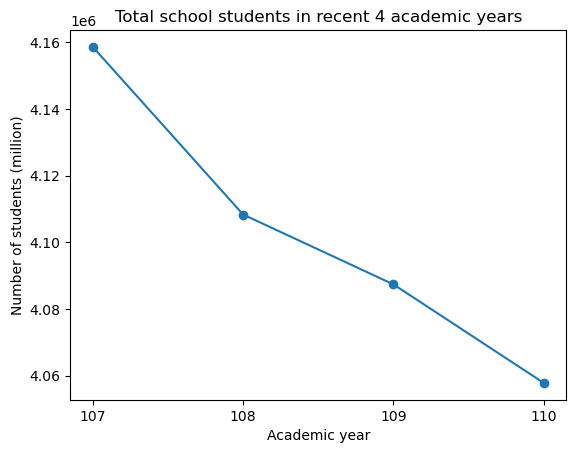

從 107 到 108 學年, 學生總人數成長率為 -1.21%
從 108 到 109 學年, 學生總人數成長率為 -0.51%
從 109 到 110 學年, 學生總人數成長率為 -0.72%


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔
df1 = pd.read_csv('107edu.csv')
df2 = pd.read_csv('108edu.csv')
df3 = pd.read_csv('109edu.csv')
df4 = pd.read_csv('110edu.csv')

# 取出需要處理的部分表格資料
data1 = df1.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data2 = df2.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data3 = df3.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data4 = df4.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

# 計算學生總人數
sum1 = data1.sum().sum()
sum2 = data2.sum().sum()
sum3 = data3.sum().sum()
sum4 = data4.sum().sum()

# 將學生總人數加入list中
sum_list = [sum1, sum2, sum3, sum4]

# 計算學生人數成長率
growth_rate_list = [(sum_list[i] - sum_list[i-1])/sum_list[i-1]*100 for i in range(1,len(sum_list))]

# 繪製折線圖
plt.plot(['107', '108', '109', '110'], sum_list, marker='o')

# 設定標題與標籤
plt.title('Total school students in recent 4 academic years')
plt.xlabel('Academic year')
plt.ylabel('Number of students (million)')

# 顯示圖表
plt.show()

# 輸出學生人數成長率
for i, rate in enumerate(growth_rate_list):
    print(f"從 {i+107} 到 {i+108} 學年, 學生總人數成長率為 {rate:.2f}%")


### 4. 繪製106學年度~110學年度學生總人數的長條圖

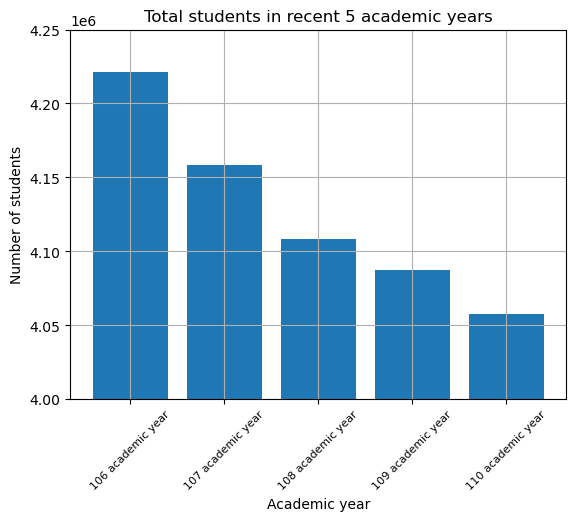

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔
df1 = pd.read_csv('106edu.csv')
df2 = pd.read_csv('107edu.csv')
df3 = pd.read_csv('108edu.csv')
df4 = pd.read_csv('109edu.csv')
df5 = pd.read_csv('110edu.csv')

# 取出需要處理的部分表格資料
data1 = df1.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data2 = df2.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data3 = df3.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data4 = df4.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data5 = df5.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

# 計算學生總人數
sum1 = data1.sum().sum()
sum2 = data2.sum().sum()
sum3 = data3.sum().sum()
sum4 = data4.sum().sum()
sum5 = data5.sum().sum()

# 將學生總人數加入list中
sum_list = [sum1, sum2, sum3, sum4, sum5]

# 繪製長條圖
plt.bar(['106 academic year', '107 academic year', '108 academic year', '109 academic year', '110 academic year'], height=sum_list)

# 設定標題與標籤
plt.title('Total students in recent 5 academic years')
plt.xlabel('Academic year')
plt.ylabel('Number of students')
plt.grid(True)

# 設定x軸標籤旋轉角度
plt.xticks(rotation=45, fontsize=8)

# 設定Y軸範圍
plt.ylim(4000000, 4250000)

# 顯示圖表
plt.show()


#### 問5. 106學年度~110學年度，平均每學年減少多少學生?

In [8]:
import pandas as pd

# 讀取CSV檔
df1 = pd.read_csv('106edu.csv')
df2 = pd.read_csv('107edu.csv')
df3 = pd.read_csv('108edu.csv')
df4 = pd.read_csv('109edu.csv')
df5 = pd.read_csv('110edu.csv')

# 取出需要處理的部分表格資料
data1 = df1.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data2 = df2.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data3 = df3.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data4 = df4.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data5 = df5.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

# 計算學生總人數
total_students = []
for data in [data1, data2, data3, data4, data5]:
    total_students.append(data.sum().sum())

# 計算總共減少的學生數量
total_drop = sum1 - sum4

# 計算平均每學年減少的學生數量
avg_drop = total_drop / 4

print(f"106學年度至110學年度平均每學年減少{avg_drop:.1f}位學生")

106學年度至110學年度平均每學年減少33560.2位學生


#### 問6. 106學年度~110學年度，每學年減少的學生占該年度學生總數的百分比為何?

In [5]:
import pandas as pd

# 讀取CSV檔
df1 = pd.read_csv('106edu.csv')
df2 = pd.read_csv('107edu.csv')
df3 = pd.read_csv('108edu.csv')
df4 = pd.read_csv('109edu.csv')
df5 = pd.read_csv('110edu.csv')

# 取出需要處理的部分表格資料
data1 = df1.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data2 = df2.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data3 = df3.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data4 = df4.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data5 = df5.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

# 計算學生總人數
sum1 = data1.sum().sum()
sum2 = data2.sum().sum()
sum3 = data3.sum().sum()
sum4 = data4.sum().sum()
sum5 = data5.sum().sum()

# 計算每學年減少的學生數
diff1 = abs(sum2 - sum1)
diff2 = abs(sum3 - sum2)
diff3 = abs(sum4 - sum3)
diff4 = abs(sum5 - sum4)

# 計算每學年減少的學生數佔該年度學生總數的百分比
percent1 = diff1 / sum1 * 100
percent2 = diff2 / sum2 * 100
percent3 = diff3 / sum3 * 100
percent4 = diff4 / sum4 * 100

print('106學年度到110學年度每學年平均減少的學生數佔該年度學生總數的百分比分別為：')
print('107學年度：{:.2f}%'.format(percent1))
print('108學年度：{:.2f}%'.format(percent2))
print('109學年度：{:.2f}%'.format(percent3))
print('110學年度：{:.2f}%'.format(percent4))


106學年度到110學年度每學年平均減少的學生數佔該年度學生總數的百分比分別為：
107學年度：1.49%
108學年度：1.21%
109學年度：0.51%
110學年度：0.72%


### 5. 依據106學年~110學年的資料，繪製出後10年的學生人數預測趨勢圖
    學生總人數為第2, 3, 4, 5, 6, 10欄的資料加總。
    須新增一個X軸為年度，Y軸為學生數。
    多預測10年，預測部分以虛線表示

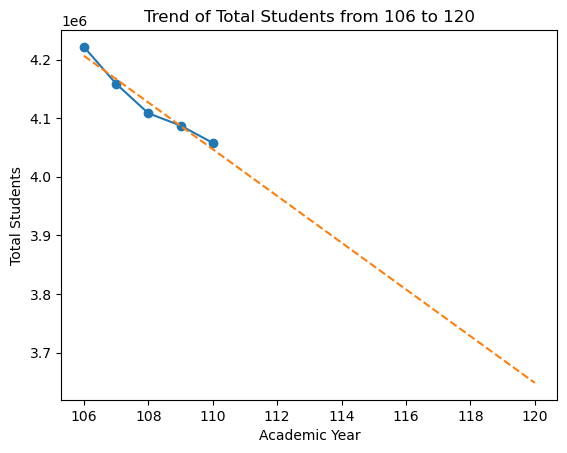

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔
df1 = pd.read_csv('106edu.csv')
df2 = pd.read_csv('107edu.csv')
df3 = pd.read_csv('108edu.csv')
df4 = pd.read_csv('109edu.csv')
df5 = pd.read_csv('110edu.csv')

# 取出需要處理的部分表格資料
data1 = df1.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data2 = df2.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data3 = df3.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data4 = df4.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data5 = df5.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

# 計算學生總人數
total_students = []
for data in [data1, data2, data3, data4, data5]:
    total_students.append(data.sum().sum())

# 新建一個 DataFrame 存儲年度和學生數
df = pd.DataFrame({'Year': list(range(106, 111)),
                   'Students': total_students})

from sklearn.linear_model import LinearRegression

# 訓練線性回歸模型
model = LinearRegression()
model.fit(df[['Year']], df['Students'])

# 預測未來學生數量
future_years = list(range(106, 121))
future_students = model.predict(pd.DataFrame({'Year': future_years}))


# 繪製趨勢圖
plt.plot(df['Year'], df['Students'], marker='o')
plt.plot(future_years, future_students, linestyle='--')
plt.xlabel('Academic Year')
plt.ylabel('Total Students')
plt.title('Trend of Total Students from 106 to 120 Academic Year')
plt.show()

#### 問7. 根據106學年~110學年的資料繪製出趨勢線。何時學生人數會低於400萬?
    預測111學年~112學年學生人數會低於400萬

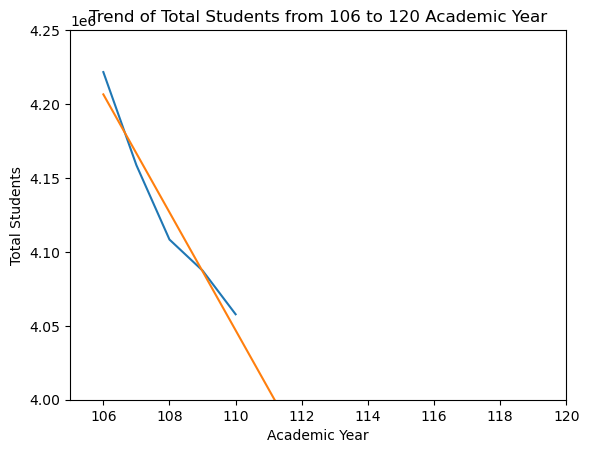

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取CSV檔
df1 = pd.read_csv('106edu.csv')
df2 = pd.read_csv('107edu.csv')
df3 = pd.read_csv('108edu.csv')
df4 = pd.read_csv('109edu.csv')
df5 = pd.read_csv('110edu.csv')

# 取出需要處理的部分表格資料
data1 = df1.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data2 = df2.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data3 = df3.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data4 = df4.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)
data5 = df5.iloc[:, [2, 3, 4, 5, 6, 10]].astype(float)

# 計算學生總人數
total_students = []
for data in [data1, data2, data3, data4, data5]:
    total_students.append(data.sum().sum())

# 新建一個 DataFrame 存儲年度和學生數
df = pd.DataFrame({'Year': list(range(106, 111)),
                   'Students': total_students})

from sklearn.linear_model import LinearRegression

# 訓練線性回歸模型
model = LinearRegression()
model.fit(df[['Year']], df['Students'])

# 預測未來學生數量
future_years = list(range(106, 120))
future_students = model.predict(pd.DataFrame({'Year': future_years}))

# 找到第一個低於 400 萬的索引位置
index = np.where(future_students < 4000000)[0][0]

# 取出低於 400 萬的年份
df = df.iloc[:index + 1]
future_years = future_years[:index + 1]
future_students = future_students[:index + 1]

# 設定Y軸範圍
plt.ylim(4000000, 4250000)

# 繪製趨勢圖
plt.plot(df['Year'], df['Students'])
plt.plot(future_years, future_students)
plt.xlim(105, 120)
plt.xlabel('Academic Year')
plt.ylabel('Total Students')
plt.title('Trend of Total Students from 106 to 120 Academic Year')
plt.show()
